In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [55]:
dataset = pd.read_csv('boston_housing.csv').values
X = dataset[:,:-1]
y = dataset[:,-1]

In [56]:
from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(X,y,test_size=0.3,
                                               random_state = 1)

In [57]:
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor(n_estimators=10, learning_rate=0.5,
                              min_samples_split=50, random_state=1)
gb.fit(xTrain,yTrain)

GradientBoostingRegressor(learning_rate=0.5, min_samples_split=50,
                          n_estimators=10, random_state=1)

In [58]:
yTrainPred = gb.predict(xTrain)
yTestPred = gb.predict(xTest)

In [59]:
from sklearn.metrics import mean_squared_error
print('[train mse]: ', mean_squared_error(yTrain,yTrainPred))
print('[test mse]: ', mean_squared_error(yTest,yTestPred))

[train mse]:  4.897642517397862
[test mse]:  8.403678478947663


In [64]:
gb.estimators_[5]

array([DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
                      min_samples_split=50,
                      random_state=RandomState(MT19937) at 0x22E3A5B3D40)],
      dtype=object)

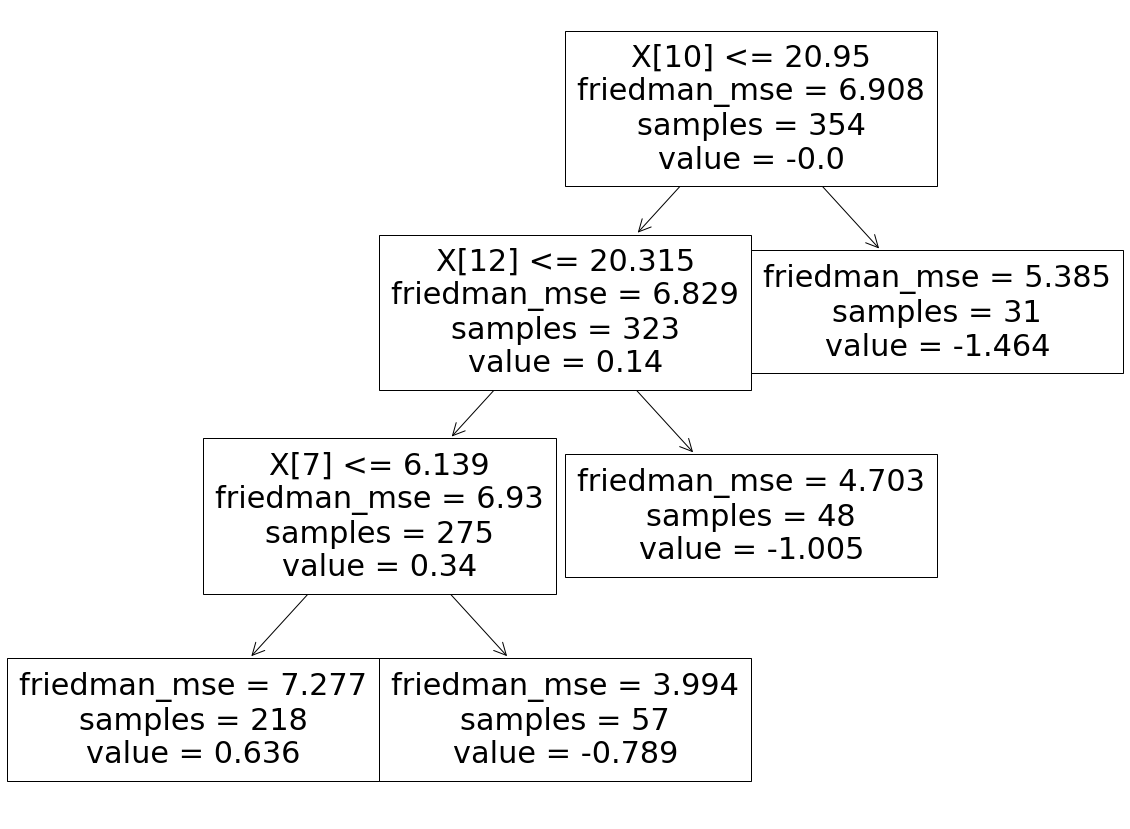

In [69]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20,15))
# RandomForest의 경우 rf.estimators_[i]: index=i인 Decision tree이지만
# GradientBoosting의 경우, gb.estimators_[i,0]: index=i인 Decision tree임
gbTree= gb.estimators_[5,0] # 6번째 Decision tree
plot_tree(gbTree)
plt.show()

In [70]:
# GradientBoostingRegressor.estimators_[i,0] = DecisionTreeRegressor 객체
# DecisionTreeRegressor와 동일하게 attribute 사용 가능

print(gb.estimators_[1,0].tree_.node_count)
print(gb.estimators_[1,0].tree_.children_left)
print(gb.estimators_[1,0].tree_.children_right)
print(gb.estimators_[1,0].tree_.feature)
print(gb.estimators_[1,0].tree_.threshold)
print(gb.estimators_[1,0].tree_.value)

13
[ 1  2  3 -1 -1  6 -1 -1  9 10 -1 -1 -1]
[ 8  5  4 -1 -1  7 -1 -1 12 11 -1 -1 -1]
[ 5 12  7 -2 -2 10 -2 -2 10 10 -2 -2 -2]
[ 6.79700017 16.08500004  1.38484997 -2.         -2.         19.65000057
 -2.         -2.         19.40000057 14.75       -2.         -2.
 -2.        ]
[[[ 4.91759803e-16]]

 [[-1.74563823e+00]]

 [[-4.67453870e-01]]

 [[ 1.38300847e+01]]

 [[-7.76589840e-01]]

 [[-4.13748816e+00]]

 [[-9.93689940e-01]]

 [[-5.17163231e+00]]

 [[ 7.90992321e+00]]

 [[ 9.15396796e+00]]

 [[ 1.25019834e+01]]

 [[ 7.84742536e+00]]

 [[-2.22015544e+00]]]
